In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [18, 8]

In [2]:
movies = pd.read_csv('Updated movie.csv')
users = pd.read_csv('Updated Ratings.csv')
print('Users shape:', users.shape)
print('Movies shape:', movies.shape)

Users shape: (25, 5)
Movies shape: (25, 4)


In [3]:
movies.head(15)

,MovieId,Title,Year,Genre
0,1.0,Toy Story,1995.0,Adventure|Animation|Children|Comedy|Fantasy
1,2.0,Jumanji,1995.0,Adventure|Children|Fantasy
2,3.0,Grumpier Old Men,1995.0,Comedy|Romance
3,4.0,Clueless,1995.0,Comedy|Drama|Romance
4,5.0,Father of the Bride Part II,1995.0,Comedy
5,6.0,Heat,1995.0,Action|Crime|Thriller
6,7.0,Sabrina,1995.0,Comedy|Romance
7,8.0,Tom and Huck,1995.0,Adventure|Children
8,9.0,Sudden Death,1995.0,Action
9,10.0,GoldenEye,1995.0,Action|Adventure|Thriller


In [4]:
users.head(15)

,UserId,MovieId,Rating,Age,Gender
0,1.0,16.0,4.0,18.0,M
1,2.0,24.0,1.5,25.0,F
2,3.0,32.0,4.0,25.0,F
3,4.0,47.0,4.0,18.0,F
4,5.0,50.0,4.0,18.0,M
5,6.0,110.0,4.0,1.0,F
6,7.0,150.0,3.0,35.0,M
7,8.0,161.0,4.0,25.0,F
8,9.0,165.0,3.0,18.0,F
9,10.0,204.0,0.5,25.0,M


In [5]:
movie_data = pd.merge(users, movies, on ='MovieId')

movie_data.head()

,UserId,MovieId,Rating,Age,Gender,Title,Year,Genre
0,1.0,16.0,4.0,18.0,M,Casino,1995.0,Crime|Drama
1,2.0,24.0,1.5,25.0,F,Powder,1995.0,Drama|Sci-Fi
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
movie_data.groupby('Title')['Rating'].mean().head()

Title
Casino     4.0
Powder     1.5
Name: Rating, dtype: float64

In [7]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('Title')['Rating'].mean())

In [8]:
ratings_mean_count['No of Ratings'] = pd.DataFrame(movie_data.groupby('Title')['Rating'].count())

In [9]:
ratings_mean_count.head()

,Rating,No of Ratings
Title,,
Casino,4.0,1
Powder,1.5,1


<Axes: >

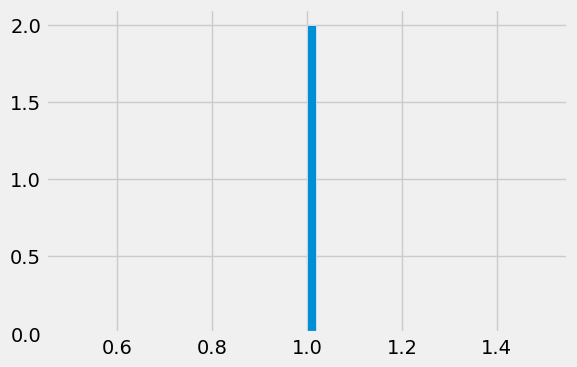

In [10]:
plt.figure(figsize=(6
                    ,4))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['No of Ratings'].hist(bins=50)

<Axes: >

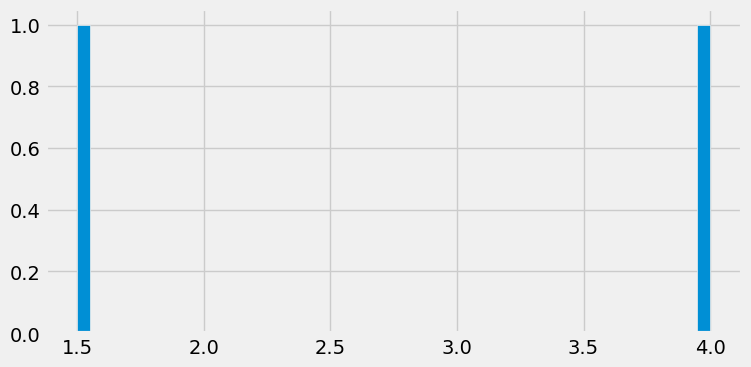

In [11]:
plt.figure(figsize=(8,4))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 800x600 with 0 Axes>

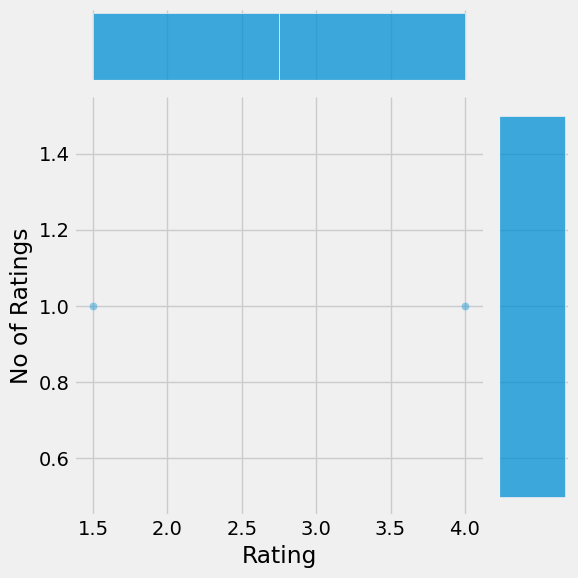

In [12]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='No of Ratings', data=ratings_mean_count, alpha=0.4)

In [13]:
user_movie_rating = movie_data.pivot_table(columns='UserId', index='Title', values='Rating')

user_movie_rating.head()

UserId,1.0,2.0
Title,,
Casino,4.0,NaN
Powder,NaN,1.5


In [14]:
ages_map = {1: 'Under 18',
            18: '18 - 24',
            25: '25 - 34',
            35: '35 - 44'}
gender_map = {'M': 'Male', 'F': 'Female'}
users['Age'] = users['Age'].map(ages_map)
users['Gender'] = users['Gender'].map(gender_map)

In [15]:
movie_data = pd.merge(users, movies, on ='MovieId')

movie_data.head(2)

,UserId,MovieId,Rating,Age,Gender,Title,Year,Genre
0,1.0,16.0,4.0,18 - 24,Male,Casino,1995.0,Crime|Drama
1,2.0,24.0,1.5,25 - 34,Female,Powder,1995.0,Drama|Sci-Fi


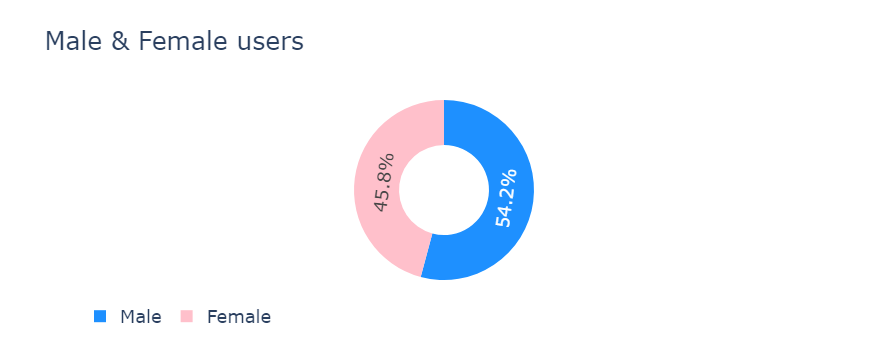

In [16]:
gender_counts = users['Gender'].value_counts()

colors1 = ['dodgerblue', 'pink']

pie = go.Pie(labels=gender_counts.index,
             values=gender_counts.values,
             marker=dict(colors=colors1),
             hole=0.5)

layout = go.Layout(title='Male & Female users', font=dict(size=18), legend=dict(orientation='h'))

fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

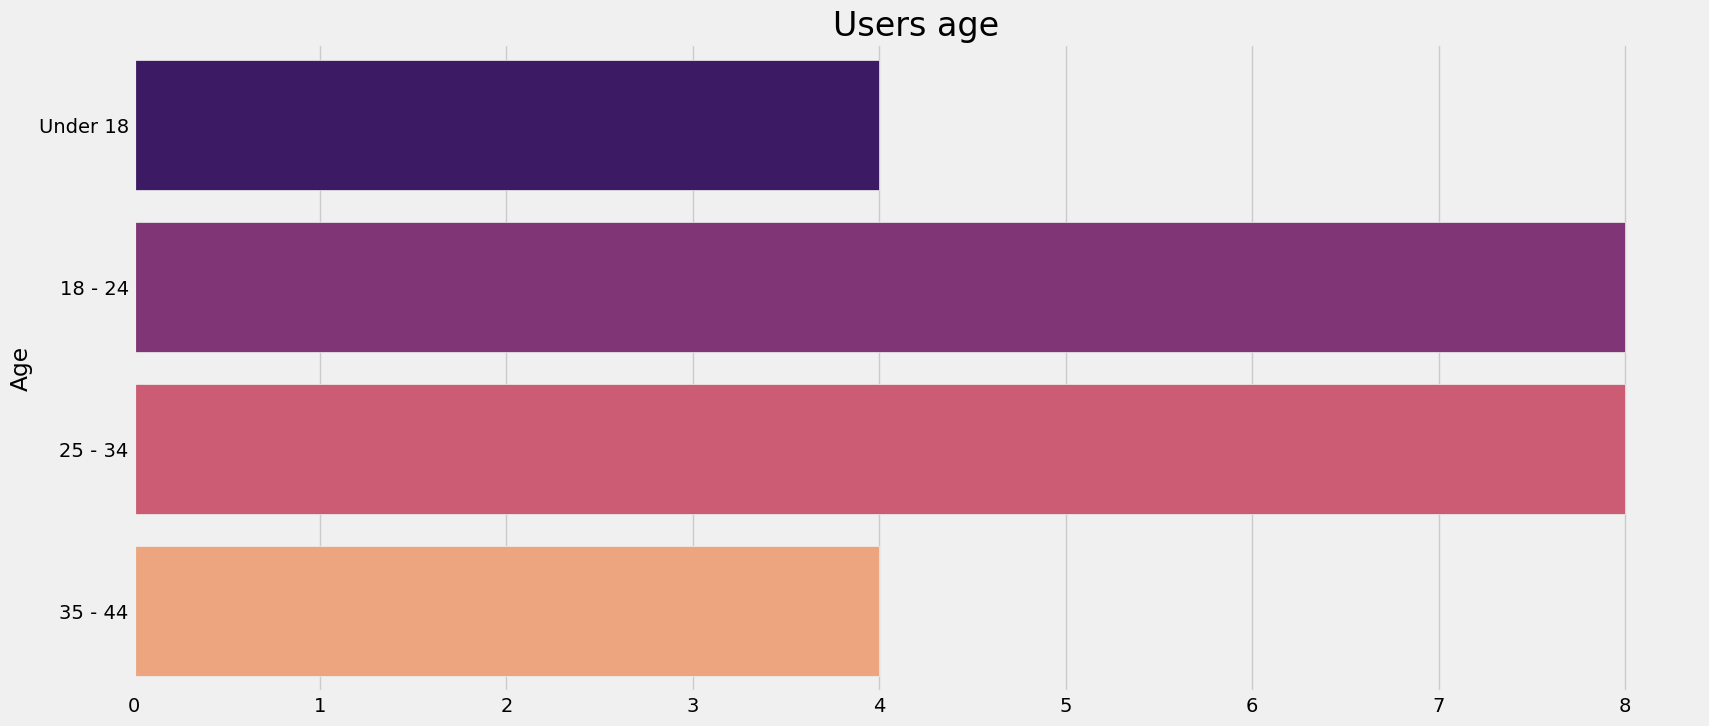

In [19]:
age_reindex = ['Under 18', '18 - 24', '25 - 34', '35 - 44']

age_counts = users['Age'].value_counts().reindex(age_reindex)

sns.barplot(x=age_counts.values,
            y=age_counts.index,
            palette='magma').set_title(
                'Users age', fontsize=24)

plt.show()